In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [3]:
df = pd.read_csv('data/data_no_fliers.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,neo,pha,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,...,class_AST,class_ATE,class_CEN,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,0,0,3.40,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,...,0,0,0,0,0,1,0,0,0,0
1,0,0,4.20,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,...,0,0,0,0,0,1,0,0,0,0
2,0,0,5.33,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,...,0,0,0,0,0,1,0,0,0,0
3,0,0,3.00,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,...,0,0,0,0,0,1,0,0,0,0
4,0,0,6.90,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,...,0,0,0,0,0,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921430 entries, 0 to 921429
Data columns (total 45 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        921430 non-null  int64  
 1   pha        921430 non-null  int64  
 2   H          921430 non-null  float64
 3   epoch      921430 non-null  float64
 4   epoch_mjd  921430 non-null  int64  
 5   epoch_cal  921430 non-null  float64
 6   e          921430 non-null  float64
 7   a          921430 non-null  float64
 8   q          921430 non-null  float64
 9   i          921430 non-null  float64
 10  om         921430 non-null  float64
 11  w          921430 non-null  float64
 12  ma         921430 non-null  float64
 13  ad         921430 non-null  float64
 14  n          921430 non-null  float64
 15  tp         921430 non-null  float64
 16  tp_cal     921430 non-null  float64
 17  per        921430 non-null  float64
 18  per_y      921430 non-null  float64
 19  moid       921430 non-n

In [5]:
X = df.drop('pha', axis=1)
y = df['pha']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [7]:
RF = RandomForestClassifier(class_weight={0:1, 1:200})
RF.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 200})

In [8]:
y_pred = RF.predict(X_test_scaled)

print('Train Report')
print(classification_report(y_train, RF.predict(X_train_scaled)))
print('\n')
print('Test Report')
print(classification_report(y_test, y_pred))

Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    689548
           1       1.00      1.00      1.00      1524

    accuracy                           1.00    691072
   macro avg       1.00      1.00      1.00    691072
weighted avg       1.00      1.00      1.00    691072



Test Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229817
           1       0.98      0.96      0.97       541

    accuracy                           1.00    230358
   macro avg       0.99      0.98      0.99    230358
weighted avg       1.00      1.00      1.00    230358



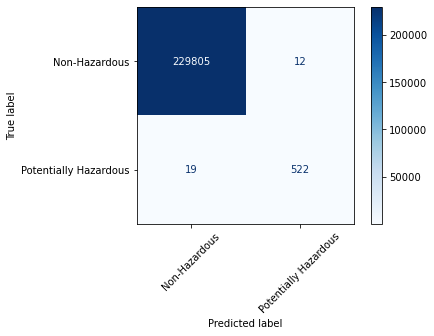

In [9]:
plot_confusion_matrix(RF, X_test_scaled, y_test, cmap=plt.cm.Blues, 
                      display_labels=['Non-Hazardous', 'Potentially Hazardous'], xticks_rotation=45.0);

In [10]:
depths = [estimator.tree_.max_depth for estimator in RF.estimators_]
print('Mean depth:', np.mean(depths))
depths

Mean depth: 26.93


[23,
 23,
 27,
 25,
 25,
 31,
 27,
 36,
 24,
 24,
 21,
 23,
 23,
 37,
 25,
 26,
 24,
 18,
 26,
 35,
 24,
 20,
 26,
 17,
 30,
 32,
 29,
 29,
 25,
 23,
 28,
 34,
 21,
 20,
 35,
 24,
 43,
 23,
 29,
 29,
 32,
 25,
 25,
 33,
 35,
 27,
 30,
 26,
 22,
 23,
 24,
 22,
 22,
 31,
 22,
 29,
 28,
 24,
 22,
 28,
 27,
 41,
 24,
 23,
 23,
 29,
 23,
 19,
 32,
 29,
 38,
 22,
 25,
 32,
 27,
 26,
 24,
 23,
 21,
 28,
 26,
 36,
 34,
 34,
 24,
 34,
 24,
 26,
 34,
 27,
 21,
 28,
 19,
 24,
 23,
 28,
 41,
 31,
 25,
 24]

In [11]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': {0: 1, 1: 200},
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Iteration 2

In [8]:
RF2 = RandomForestClassifier(random_state=123)

param_grid = {
    'class_weight': ['balanced', {0:1, 1:200}],
    'n_estimators': [50, 100],
    'max_depth': [7, 14, 21],
    'min_samples_leaf': [1, 3, 6]
}

RF2_grid = GridSearchCV(RF2, param_grid=param_grid, cv=3, scoring='recall')

In [ ]:
RF2_grid.fit(X_train_scaled, y_train)

In [15]:
y_pred = RF2_grid.predict(X_test_scaled)

print('Train Report')
print(classification_report(y_train, RF2_grid.predict(X_train_scaled)))
print('\n')
print('Test Report')
print(classification_report(y_test, y_pred))

Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    689548
           1       0.85      1.00      0.92      1524

    accuracy                           1.00    691072
   macro avg       0.93      1.00      0.96    691072
weighted avg       1.00      1.00      1.00    691072



Test Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229817
           1       0.85      1.00      0.92       541

    accuracy                           1.00    230358
   macro avg       0.92      1.00      0.96    230358
weighted avg       1.00      1.00      1.00    230358



The model is no longer overfit to the training data.

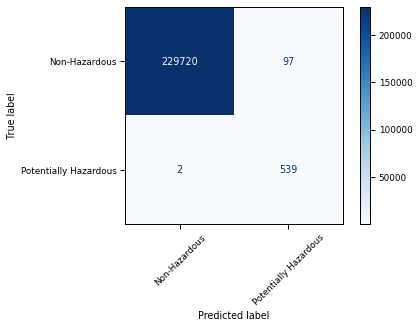

In [39]:
plot_confusion_matrix(RF2_grid, X_test_scaled, y_test, cmap=plt.cm.Blues, 
                      display_labels=['Non-Hazardous', 'Potentially Hazardous'], xticks_rotation=45.0);

In [17]:
RF2_grid.best_params_

{'class_weight': {0: 1, 1: 200},
 'max_depth': 7,
 'min_samples_leaf': 3,
 'n_estimators': 100}

### Iteration 3

Searching around `max_depth` = 7 and `min_samples_leaf` = 3

In [10]:
RF3 = RandomForestClassifier(random_state=123)

class_weights = ['balanced', {0:1, 1:200}]

param_grid = {
    'class_weight': class_weights,
    'max_depth': [6, 7, 8, 9],
    'min_samples_leaf': [2, 3, 4, 5]
}

RF3_grid = GridSearchCV(RF3, param_grid=param_grid, cv=3, scoring='recall')

In [11]:
RF3_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'class_weight': ['balanced', {0: 1, 1: 200}],
                         'max_depth': [6, 7, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5]},
             scoring='recall')

In [12]:
y_pred = RF3_grid.predict(X_test_scaled)

print('Train Report')
print(classification_report(y_train, RF3_grid.predict(X_train_scaled)))
print('\n')
print('Test Report')
print(classification_report(y_test, y_pred))

Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    689548
           1       0.50      1.00      0.67      1524

    accuracy                           1.00    691072
   macro avg       0.75      1.00      0.83    691072
weighted avg       1.00      1.00      1.00    691072



Test Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229817
           1       0.52      1.00      0.69       541

    accuracy                           1.00    230358
   macro avg       0.76      1.00      0.84    230358
weighted avg       1.00      1.00      1.00    230358



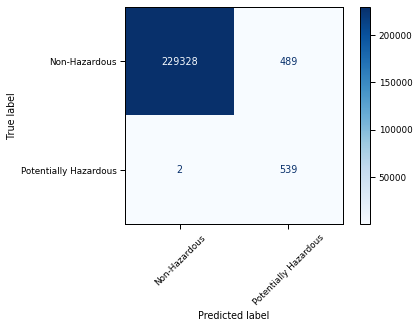

In [13]:
sns.set_context('paper')

plot_confusion_matrix(RF3_grid, X_test_scaled, y_test, cmap=plt.cm.Blues, 
                      display_labels=['Non-Hazardous', 'Potentially Hazardous'], xticks_rotation=45.0);

In [14]:
RF3_grid.best_params_

{'class_weight': 'balanced', 'max_depth': 6, 'min_samples_leaf': 2}

### Iteration 4

Last gridsearch will omit `max_depth` = 6 to see if we can address the high number of false positives.

In [17]:
RF4 = RandomForestClassifier(random_state=123)

param_grid = {
    'class_weight': class_weights,
    'max_depth': [7, 8, 9],
    'min_samples_leaf': [2, 3, 4, 5]
}

RF4_grid = GridSearchCV(RF4, param_grid=param_grid, cv=3, scoring='recall')

In [18]:
RF4_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'class_weight': ['balanced', {0: 1, 1: 200}],
                         'max_depth': [7, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5]},
             scoring='recall')

In [19]:
y_pred = RF4_grid.predict(X_test_scaled)

print('Train Report')
print(classification_report(y_train, RF4_grid.predict(X_train_scaled)))
print('\n')
print('Test Report')
print(classification_report(y_test, y_pred))

Train Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    689548
           1       0.85      1.00      0.92      1524

    accuracy                           1.00    691072
   macro avg       0.93      1.00      0.96    691072
weighted avg       1.00      1.00      1.00    691072



Test Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    229817
           1       0.85      1.00      0.92       541

    accuracy                           1.00    230358
   macro avg       0.92      1.00      0.96    230358
weighted avg       1.00      1.00      1.00    230358



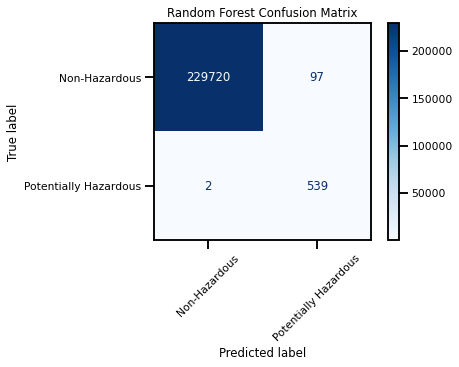

In [30]:
sns.set_context('talk', font_scale=0.65)
plot_confusion_matrix(RF4_grid, X_test_scaled, y_test, cmap=plt.cm.Blues, 
                      display_labels=['Non-Hazardous', 'Potentially Hazardous'], xticks_rotation=45.0)
plt.title('Random Forest Confusion Matrix')
plt.savefig('Images/RF-matrix.png', bbox_inches='tight')
plt.savefig('Images/RF-matrix-hr.png', dpi=200, bbox_inches='tight');

In [21]:
RF4_grid.best_params_

{'class_weight': {0: 1, 1: 200}, 'max_depth': 7, 'min_samples_leaf': 3}

In [22]:
RF4 = RandomForestClassifier(random_state=123, class_weight={0:1, 1:200}, max_depth=7, min_samples_leaf=3)

RF4.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 200}, max_depth=7,
                       min_samples_leaf=3, random_state=123)

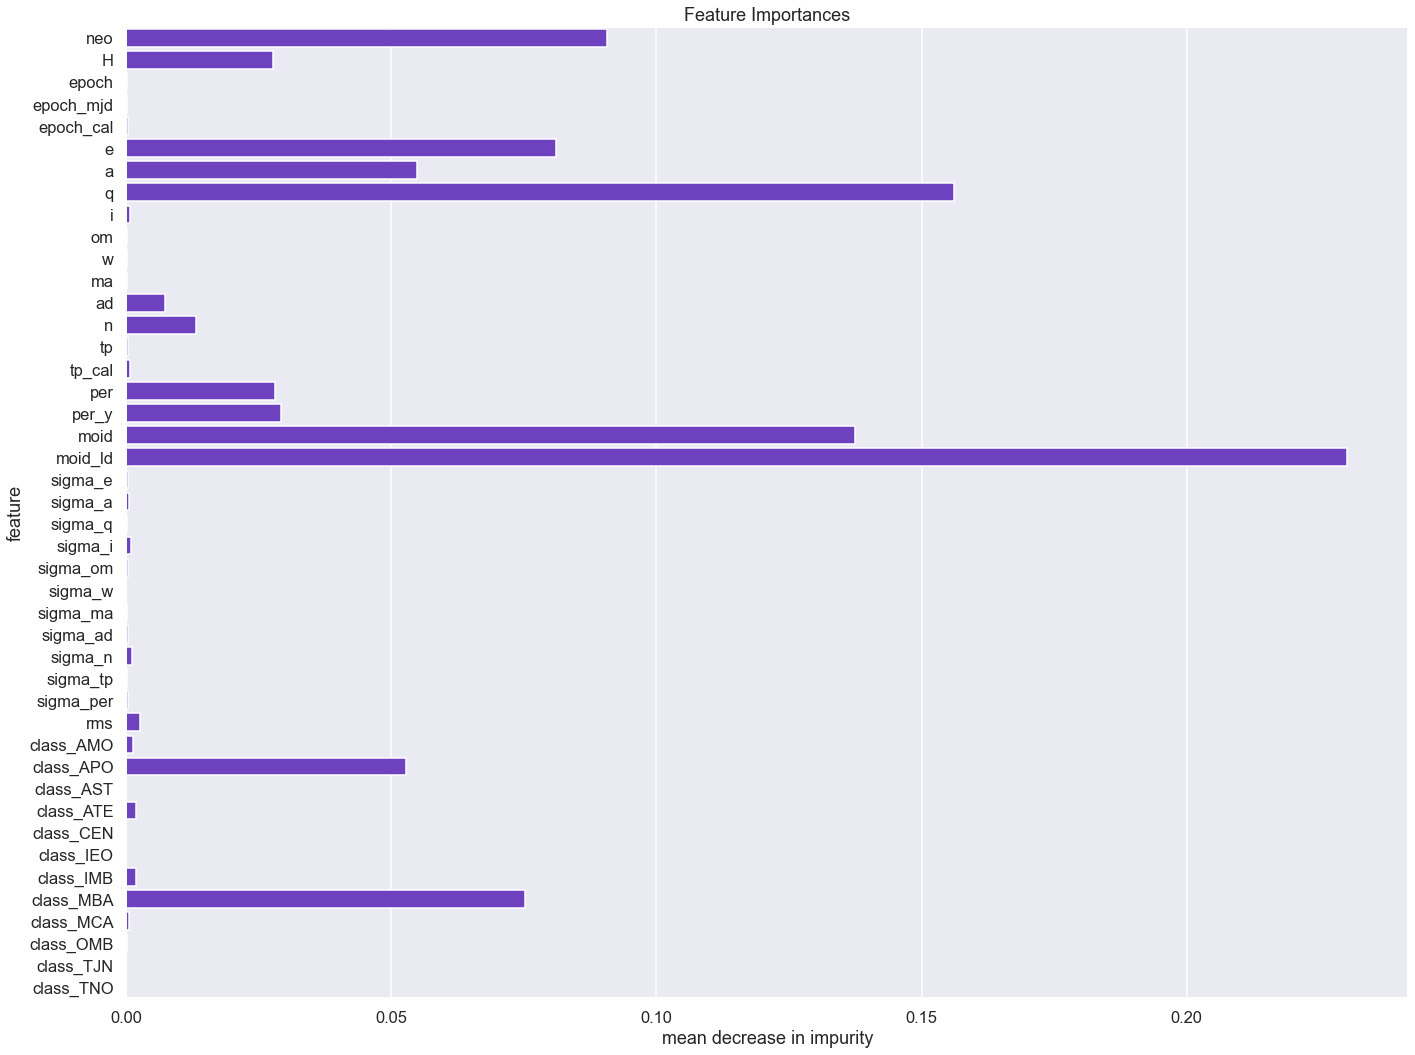

In [33]:
sns.set_context('talk')
sns.set_style('darkgrid')

plt.figure(figsize=(20, 15))
sns.barplot(x = RF4.feature_importances_, 
            y = X.columns, color='#682dd3')
plt.title('Feature Importances')
plt.xlabel('mean decrease in impurity')
plt.ylabel('feature')
plt.tight_layout()
plt.savefig('Images/RF-importances.png')
plt.savefig('Images/RF-importances.png', dpi=200);

In [34]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
X_transformed = pca.fit_transform(X_train_scaled)

In [35]:
pca.explained_variance_ratio_

array([0.19685156, 0.19090429, 0.10615482, 0.06094324, 0.04144515])

In [36]:
pca.components_

array([[ 1.27542039e-02,  1.52473281e-02, -1.58175961e-02,
        -1.58175961e-02, -1.58290957e-02,  1.03213098e-02,
        -1.84319288e-02, -1.91784300e-02, -9.85767667e-04,
        -1.53721468e-04, -2.08587819e-04, -7.20260799e-04,
        -1.27459463e-02,  1.72449064e-02, -1.40138695e-02,
        -1.39574146e-02, -1.80149625e-02, -1.80149625e-02,
        -1.89824635e-02, -1.89824635e-02,  2.66314755e-01,
         3.25919764e-01,  2.61916406e-01,  2.95404804e-01,
         2.18694776e-01,  3.27418165e-01,  3.14062198e-01,
         3.25233226e-01,  3.10534332e-01,  3.15362133e-01,
         3.27373260e-01,  6.31337904e-05,  6.32400184e-03,
         9.99037782e-03, -4.70669720e-04,  4.97793807e-03,
        -1.61738770e-03,  6.51942931e-04,  4.60691810e-03,
        -7.75711353e-03,  4.49679407e-03, -4.95202787e-03,
        -3.48840881e-03, -0.00000000e+00],
       [-2.08029712e-01, -2.40662799e-01,  7.68968374e-02,
         7.68968374e-02,  7.71649506e-02, -1.60202421e-01,
         3.22

In [37]:
pd.DataFrame(data=pca.components_, columns=X.columns).iloc[1]

neo         -0.208030
H           -0.240663
epoch        0.076897
epoch_mjd    0.076897
epoch_cal    0.077165
e           -0.160202
a            0.322068
q            0.323863
i            0.008513
om          -0.003117
w           -0.000685
ma           0.010009
ad           0.232694
n           -0.297992
tp           0.069486
tp_cal       0.069286
per          0.315567
per_y        0.315567
moid         0.320495
moid_ld      0.320495
sigma_e      0.016838
sigma_a      0.020391
sigma_q      0.016572
sigma_i      0.018457
sigma_om     0.013834
sigma_w      0.020609
sigma_ma     0.019708
sigma_ad     0.020345
sigma_n      0.019358
sigma_tp     0.019835
sigma_per    0.020503
rms         -0.000532
class_AMO   -0.103244
class_APO   -0.160802
class_AST    0.010023
class_ATE   -0.086719
class_CEN    0.031327
class_IEO   -0.011271
class_IMB   -0.085028
class_MBA    0.122478
class_MCA   -0.071720
class_OMB    0.092922
class_TJN    0.064895
class_TNO   -0.000000
Name: 1, dtype: float64